In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [2]:
gray = plt.imread('cropped_grayscale_check.jpg')

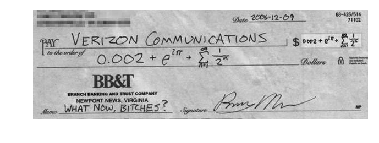

In [3]:
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

In [4]:
array, bins = np.histogram(gray.flatten(), bins = 255)

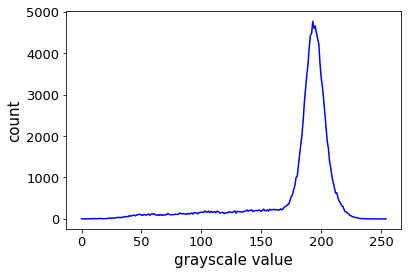

In [5]:
plt.plot(bins[:-1], array, color='blue')
plt.xlabel('grayscale value', fontsize=15)
plt.ylabel('count', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()

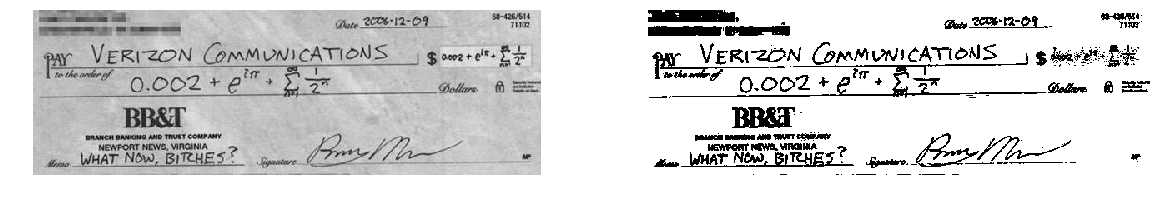

In [6]:
plt.figure(figsize=[20,10])

plt.subplot(121)
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow((gray<225) & (gray>160), cmap='gray')
plt.axis('off')

plt.show()

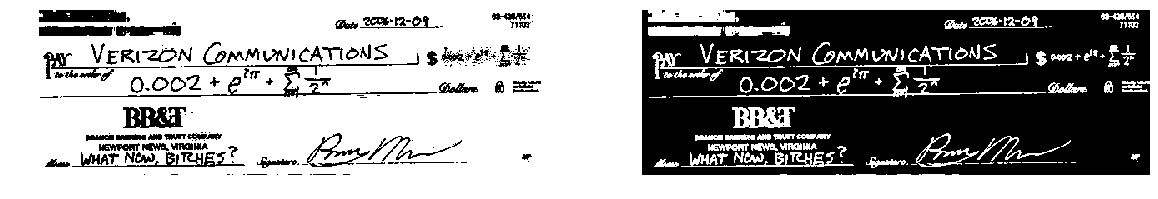

In [7]:
plt.figure(figsize=[20,10])

plt.subplot(121)
plt.imshow((gray<225) & (gray>160), cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow((gray<160) & (gray>0), cmap='gray')
plt.axis('off')

plt.show()

In [8]:
img = plt.imread('coat.jpeg')
img_crop = plt.imread('coat_pink.jpeg')

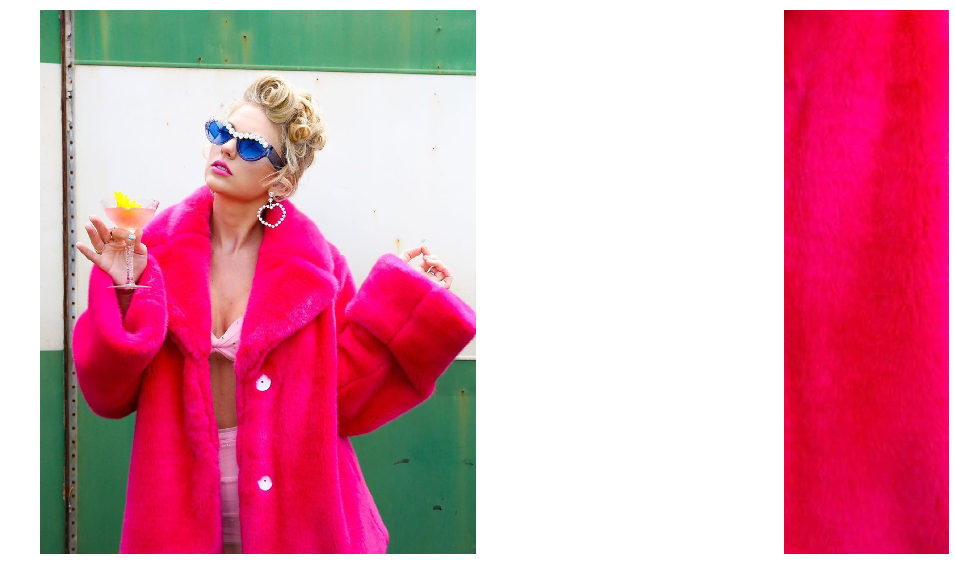

In [9]:
plt.figure(figsize=(20,10))

plt.subplot(121)
plt.imshow(img)
plt.axis('off')
plt.subplot(122)
plt.imshow(img_crop)
plt.axis('off')
plt.show()

In [10]:
img = img.astype(float)
img_crop = img_crop.astype(float)

In [11]:
def RGB(array):
    return array[:,:,0], array[:,:,1], array[:,:,2]

In [12]:
R_img,G_img,B_img = RGB(img)
R_img_crop,G_img_crop,B_img_crop = RGB(img_crop)

### Normalized Chromaticity Coordinates (NCC)

In [13]:
def NCC(R,G,B):
    I = R + G + B
   
    I[I == 0] = 1000000
    
    r = R / I
    g = G / I
    b = 1 - r - g

    return r, g ,b 

In [14]:
r_img,g_img,b_img = NCC(R_img,G_img,B_img)

r_img_crop,g_img_crop,b_img_crop = NCC(R_img_crop,G_img_crop,B_img_crop)

In [42]:
b_img = 1 - r_img.flatten() - g_img.flatten()
b_img[b_img < 0] = 0
b_img_crop = 1 - r_img_crop.flatten() - g_img_crop.flatten()
b_img_crop[b_img_crop < 0] = 0


colors_img = list(zip(r_img.flatten(), g_img.flatten(),b_img))
colors_crop = list(zip(r_img_crop.flatten(), g_img_crop.flatten(), b_img_crop))

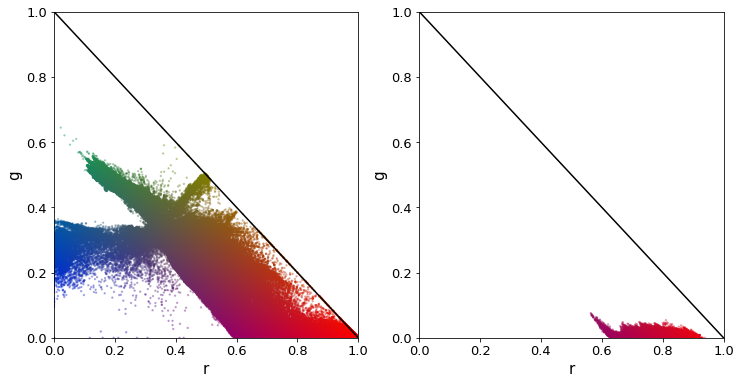

In [43]:
plt.figure(figsize=(12,6))

x = np.linspace(0,1,100)
y = -x+1

plt.subplot(121)
plt.scatter(r_img.flatten(),g_img.flatten(), s = 2, alpha=0.3, c = colors_img)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('r', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.subplot(122)
plt.scatter(r_img_crop.flatten(), g_img_crop.flatten(), s = 2, alpha=0.3, c = colors_crop)
plt.plot(x,y, color='black')
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('r', fontsize=15)
plt.ylabel('g', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.savefig('ncc_diagram.png', bbox_inches='tight')
plt.show()

### Parametric Segmentation

In [17]:
def PDF(x_img, x_crop):
    mu = np.mean(x_crop)
    sigma = np.std(x_crop)
    
    factor1 = (1 / (sigma * np.sqrt(2*np.pi)))
    factor2 = np.exp(-(x_img - mu)**2 / (2*(sigma**2)))
    
    return factor1*factor2

In [18]:
p_r = PDF(r_img, r_img_crop)
p_g = PDF(g_img, g_img_crop)

join_p = p_r * p_g

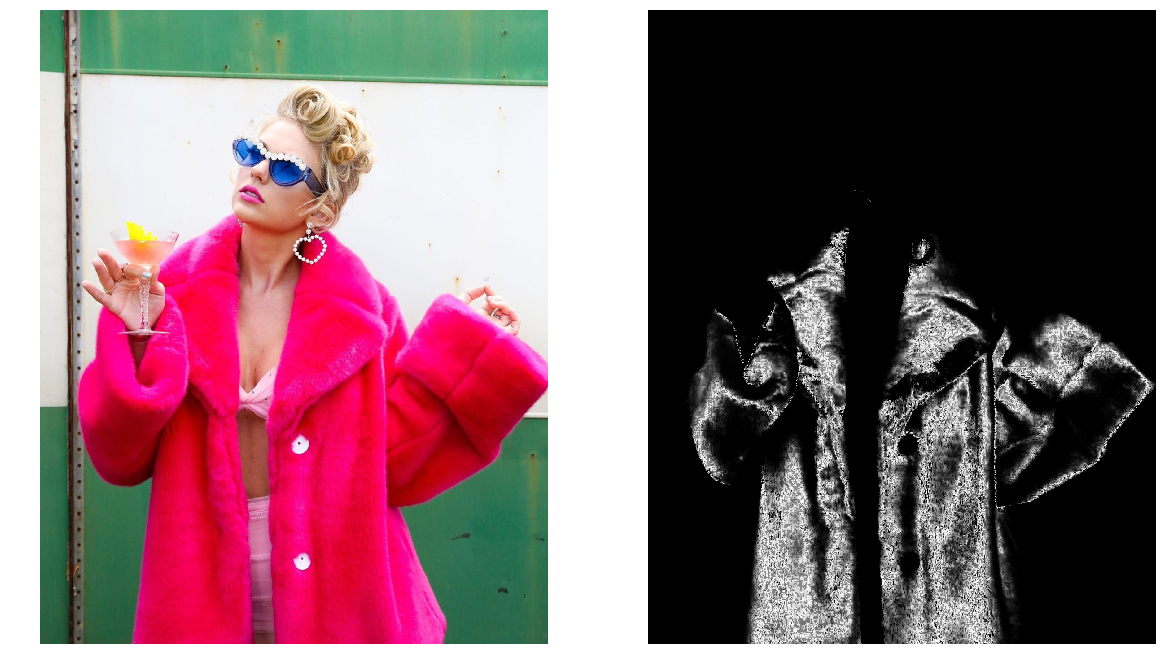

In [48]:
plt.figure(figsize=(20,20))
plt.subplot(121)
plt.imshow(plt.imread('coat.jpeg'))
plt.axis('off')
plt.subplot(122)

plt.imshow(join_p, cmap='gray')
plt.axis('off')
plt.show()

### Non-parametric segmentation

(-0.5, 1639.5, 2047.5, -0.5)

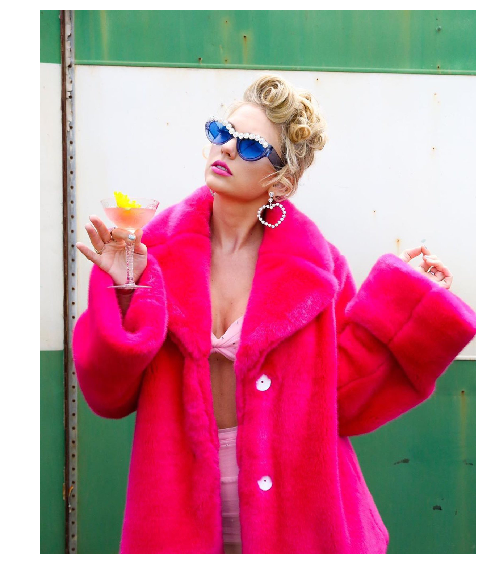

In [50]:
plt.figure(figsize=(20,10))
plt.imshow(plt.imread('coat.jpeg'))
plt.axis('off')

10


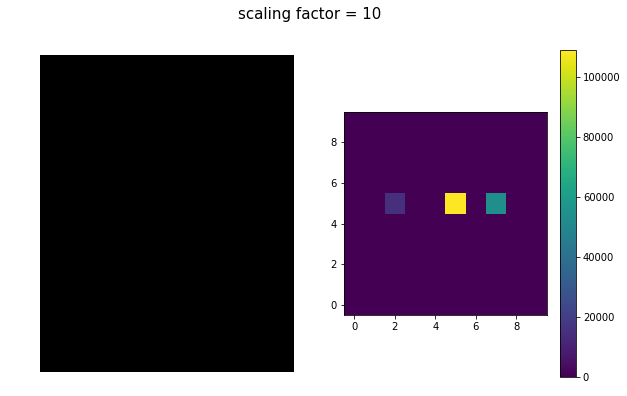

11


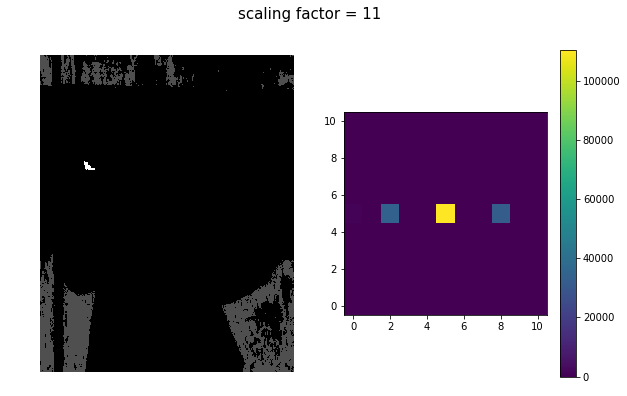

12


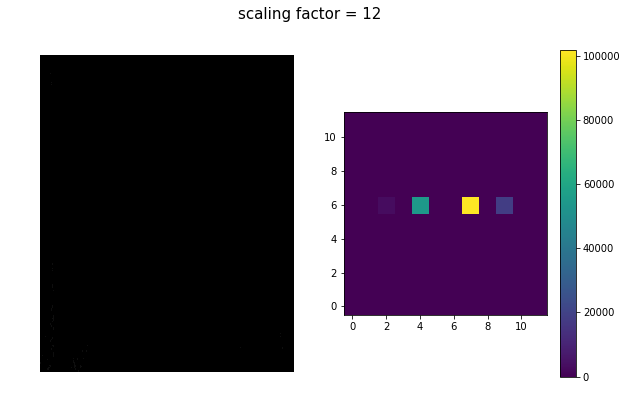

13


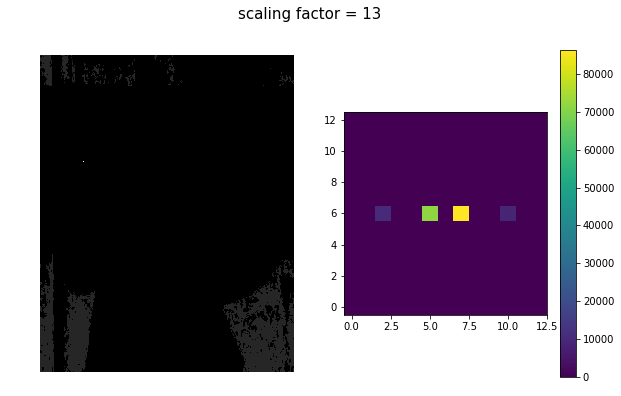

14


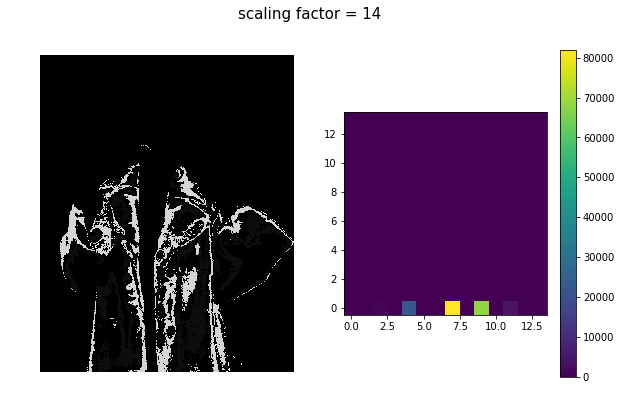

15


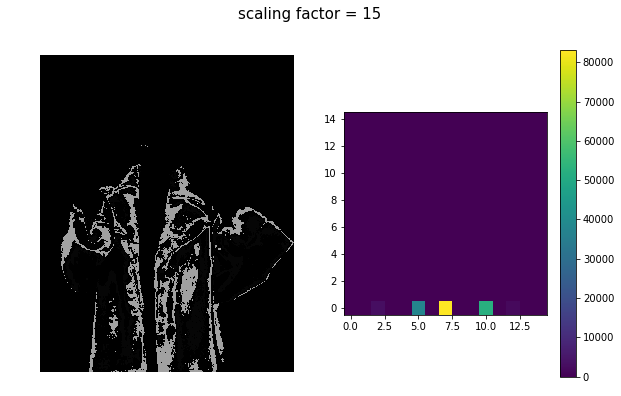

16


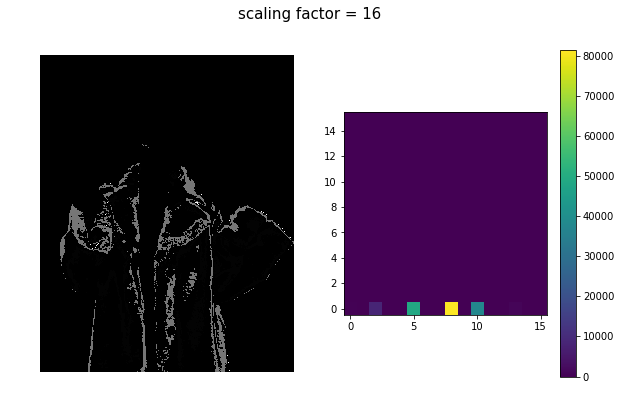

17


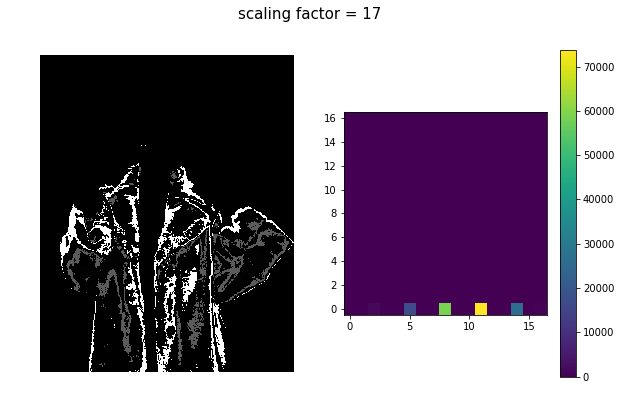

18


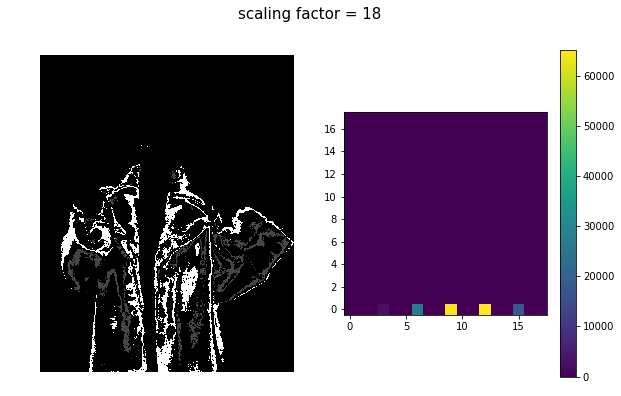

19


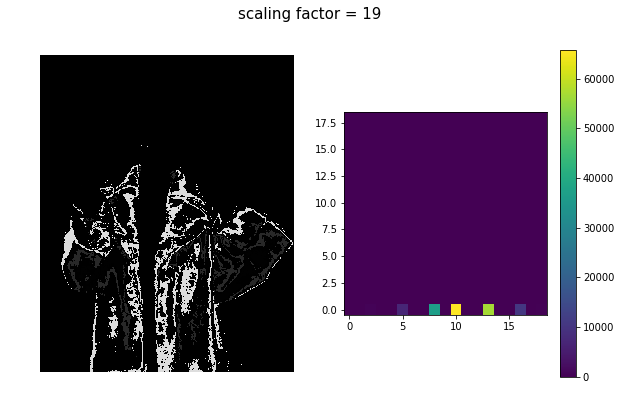

20


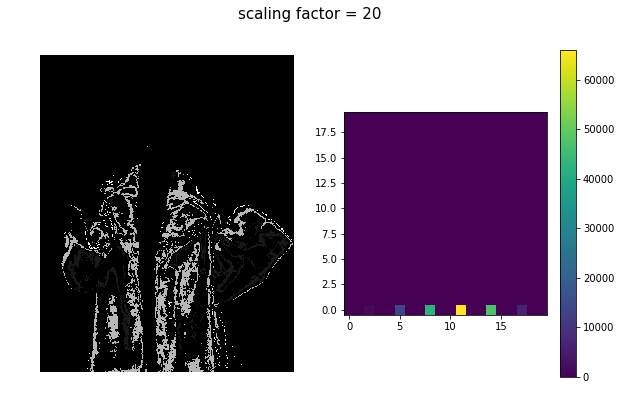

21


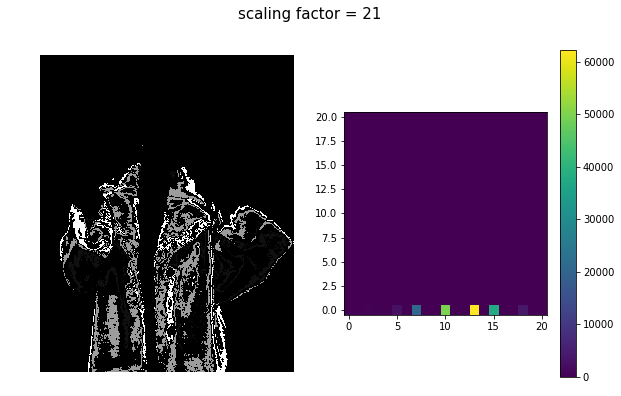

22


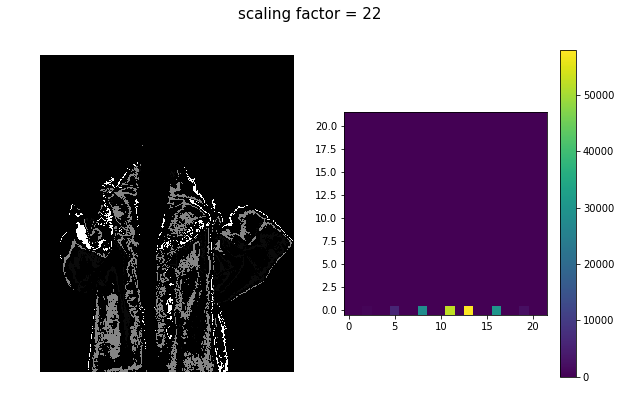

23


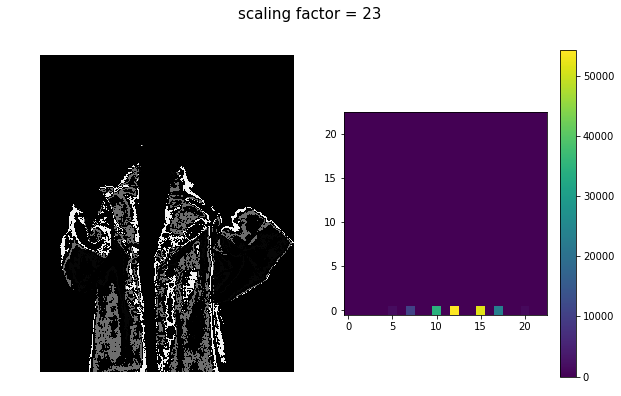

24


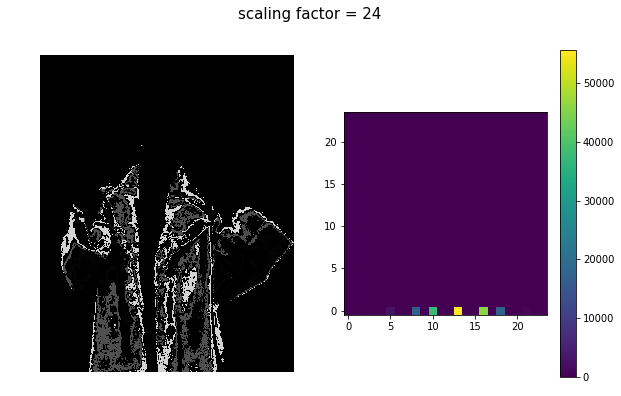

25


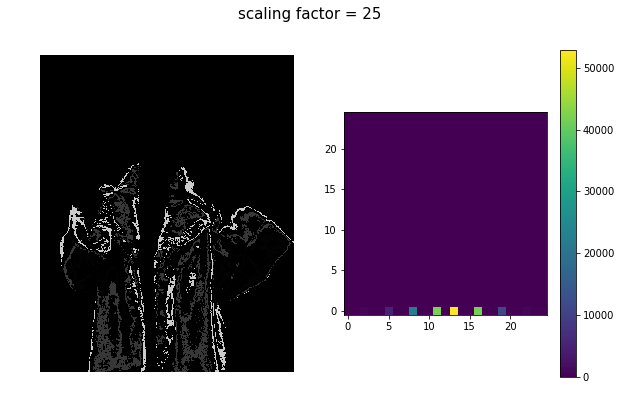

26


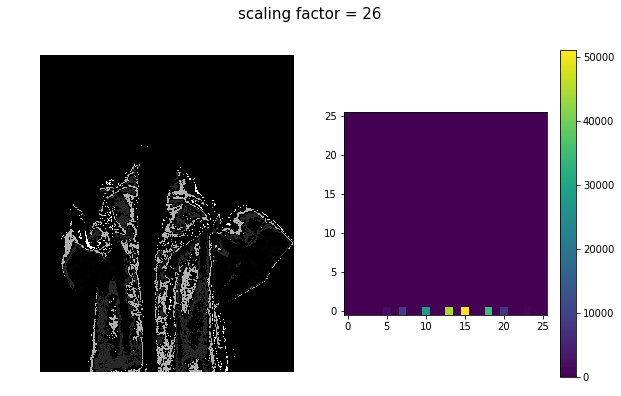

27


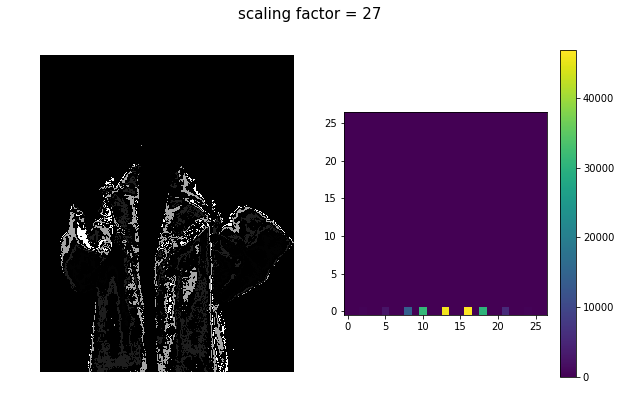

28


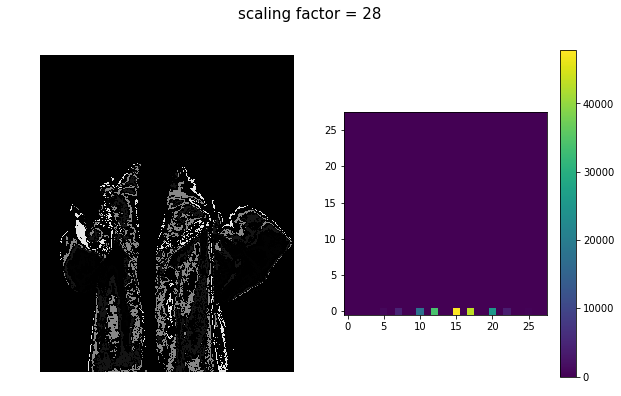

29


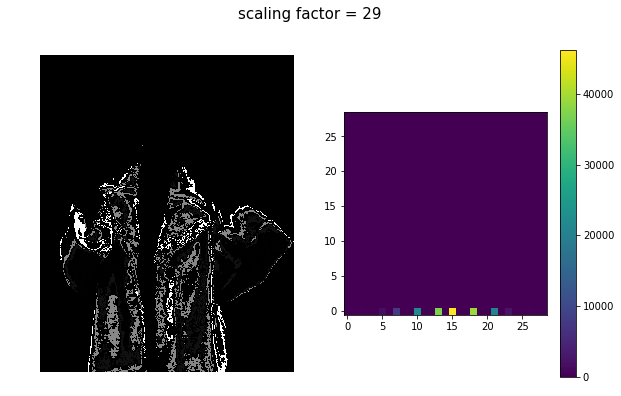

30


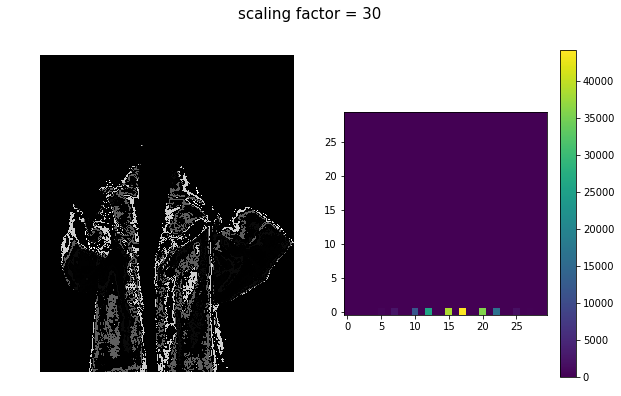

31


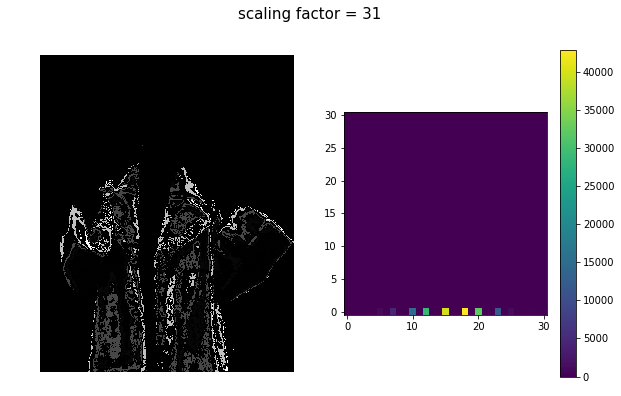

32


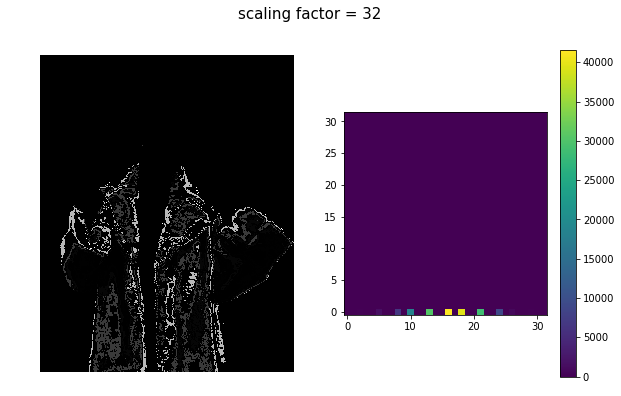

33


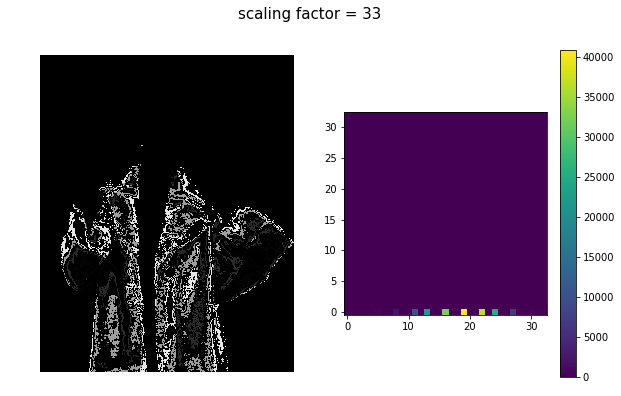

34


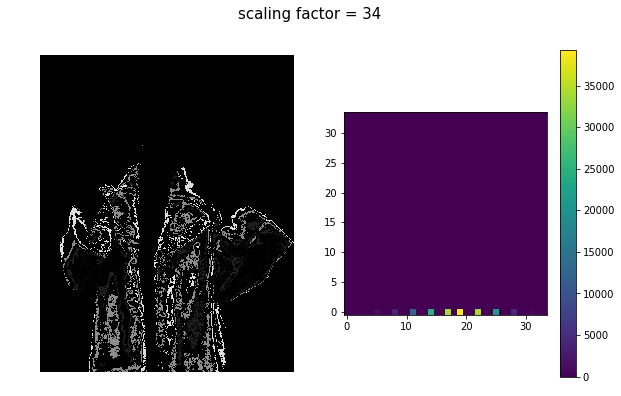

35


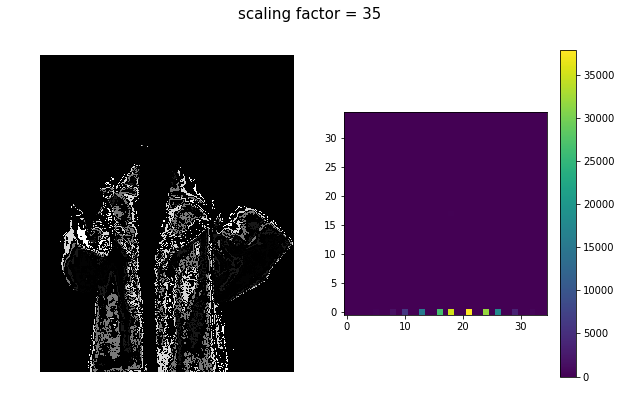

36


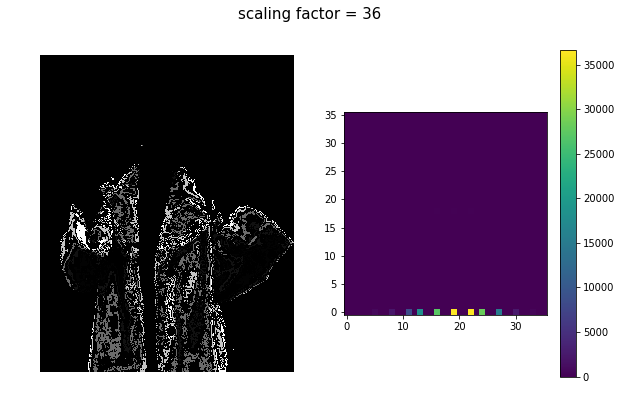

37


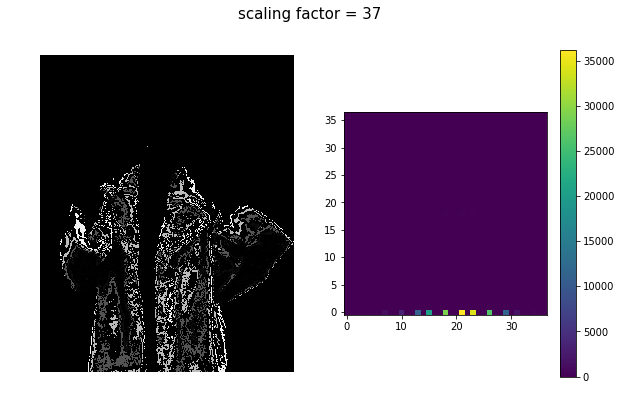

38


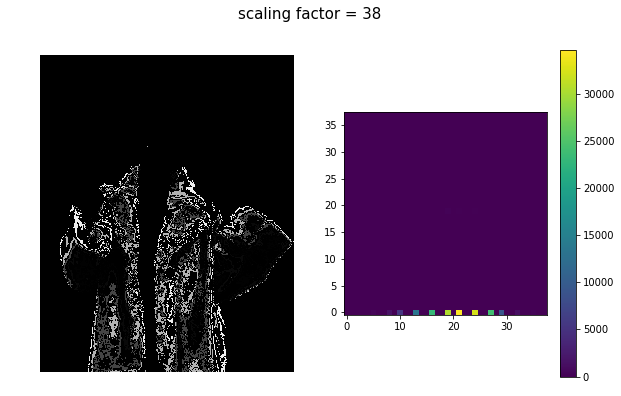

39


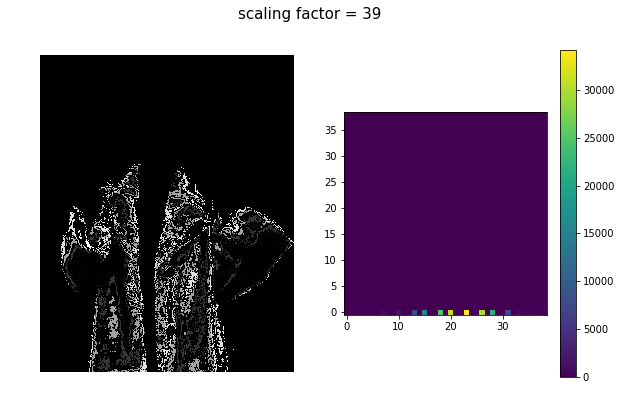

40


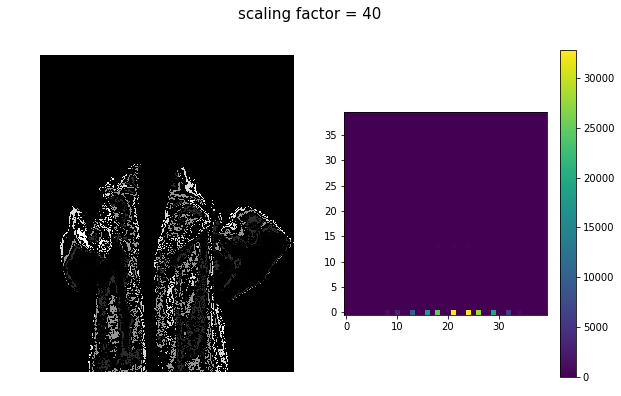

41


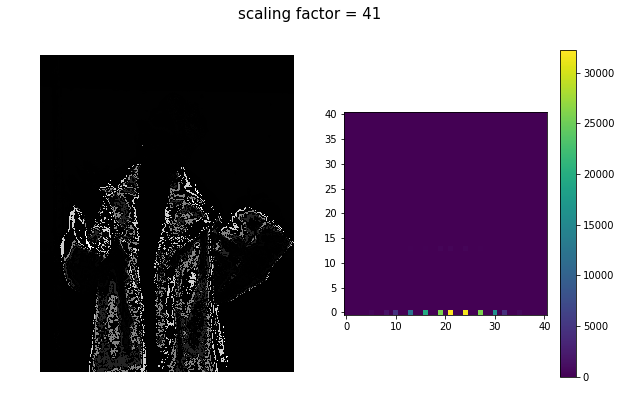

42


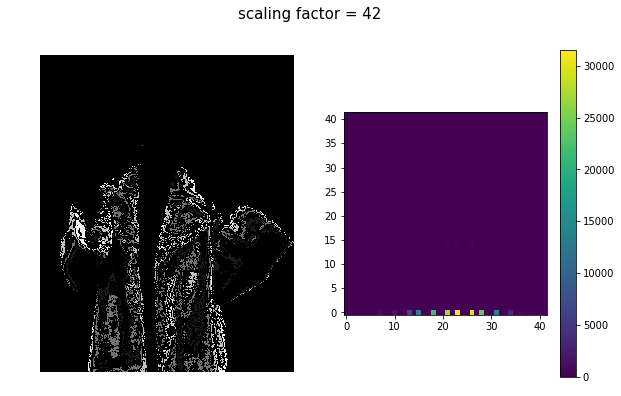

43


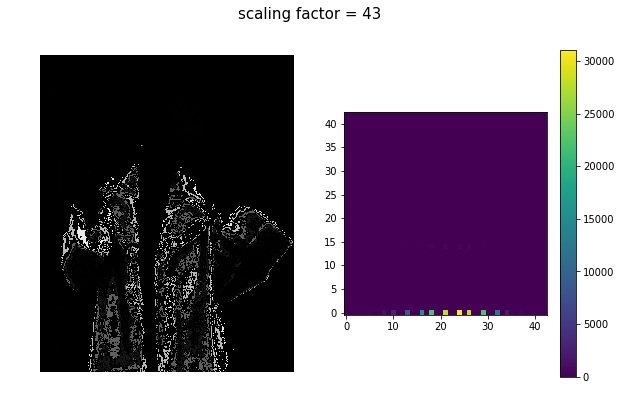

44


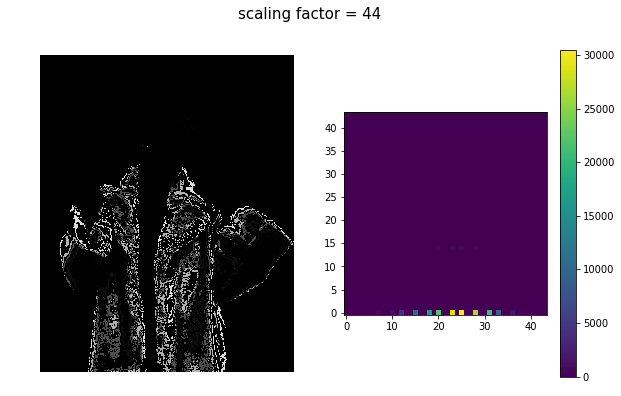

45


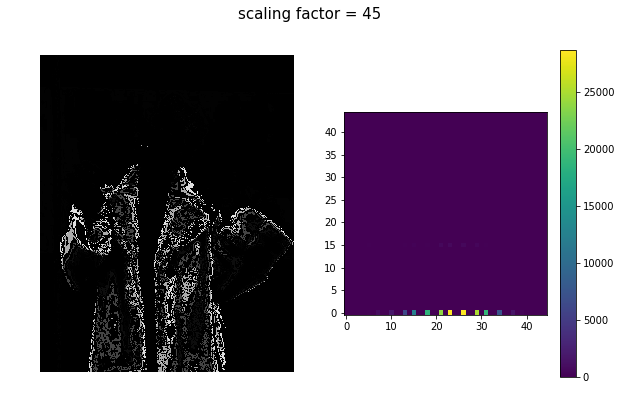

46


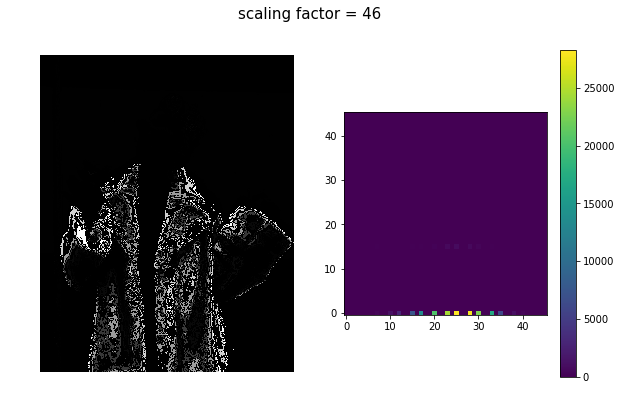

47


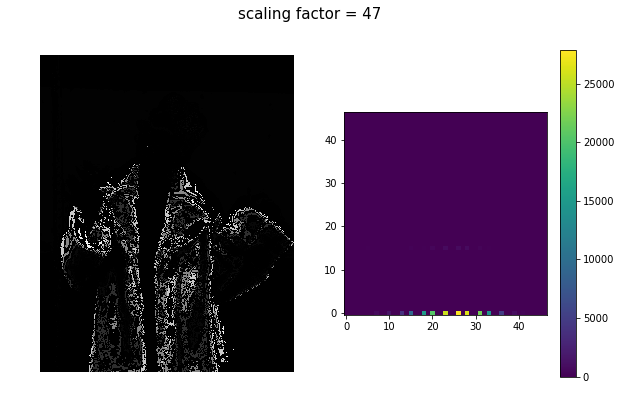

48


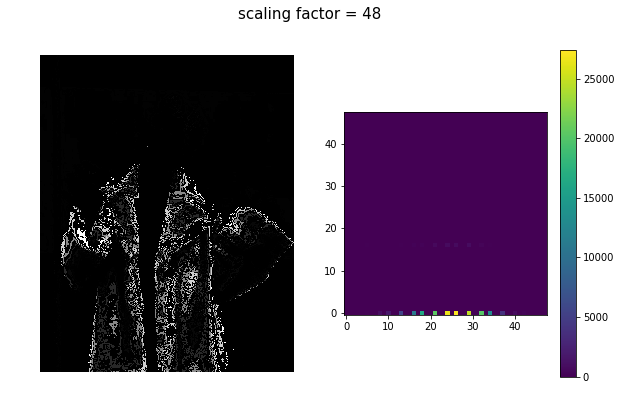

49


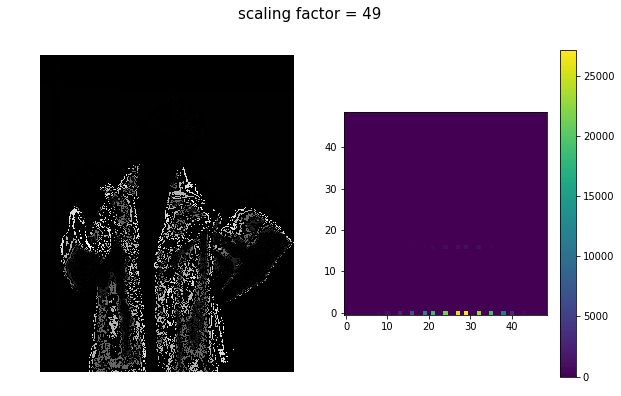

50


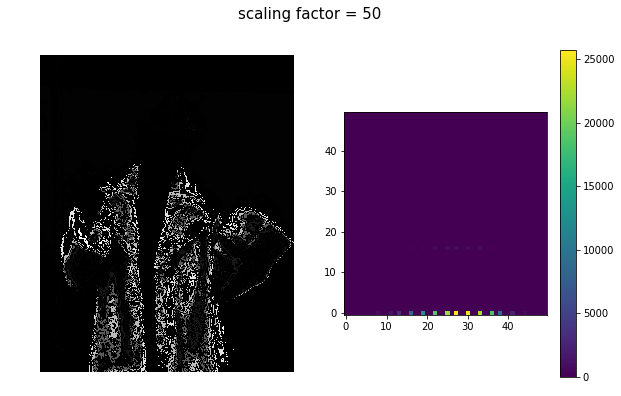

51


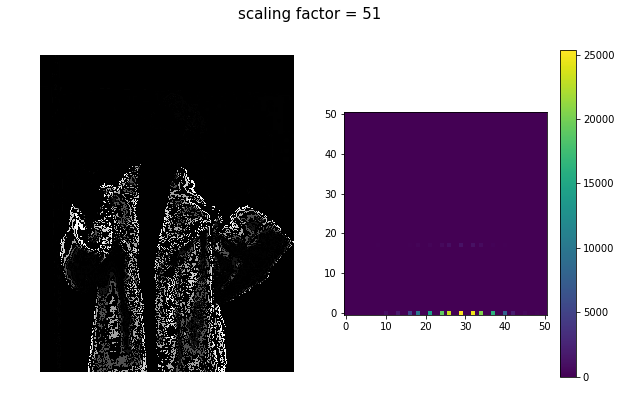

52


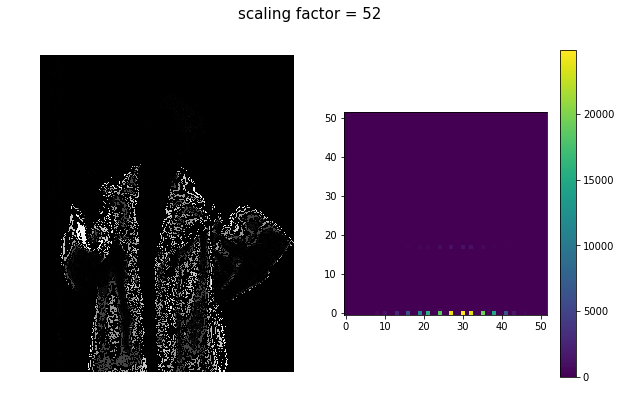

53


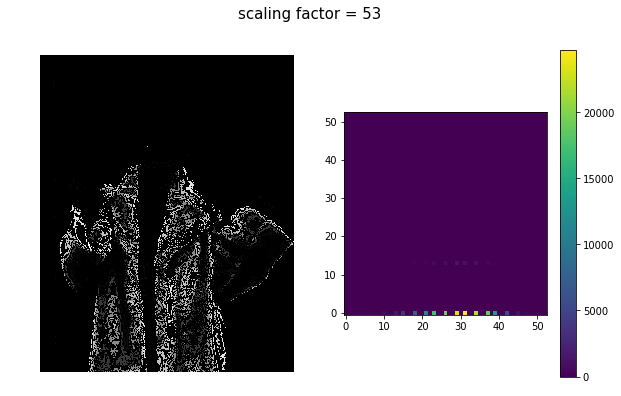

54


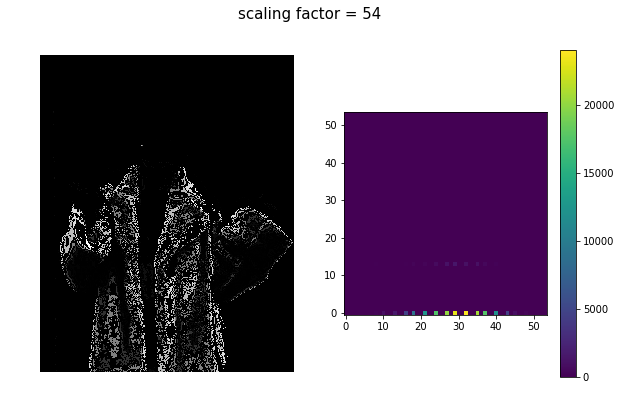

55


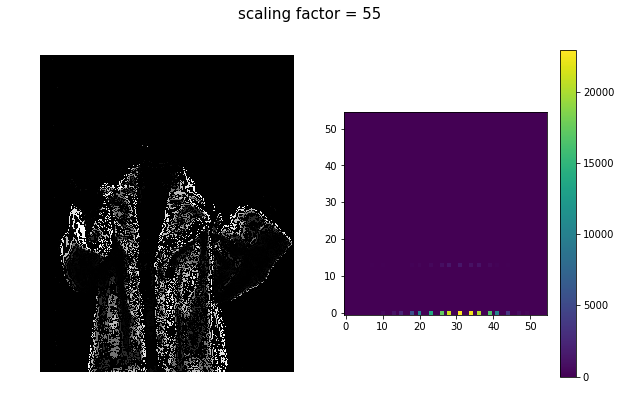

56


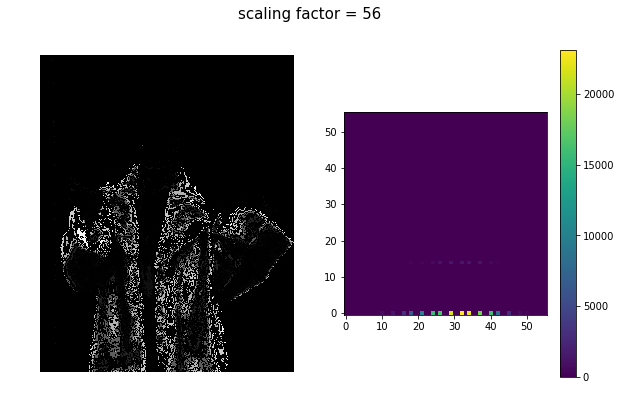

57


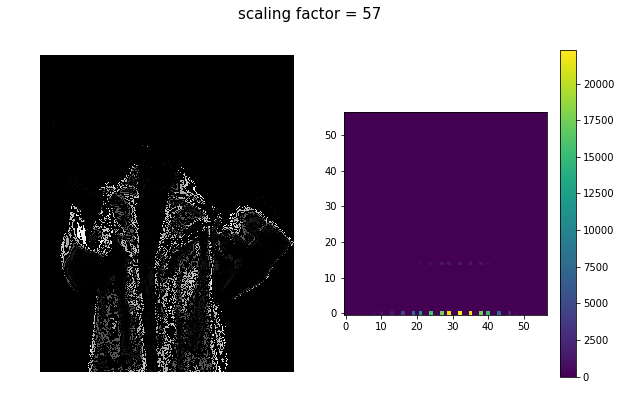

58


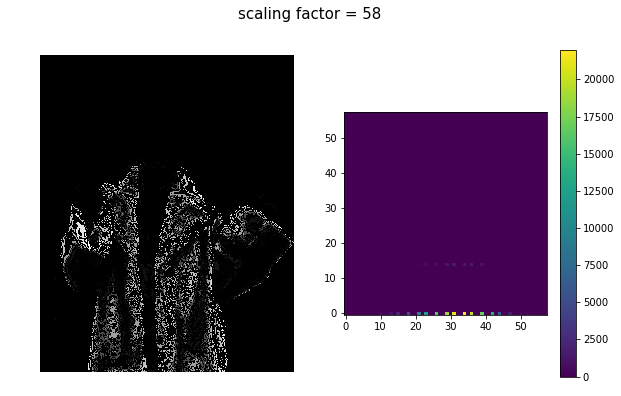

59


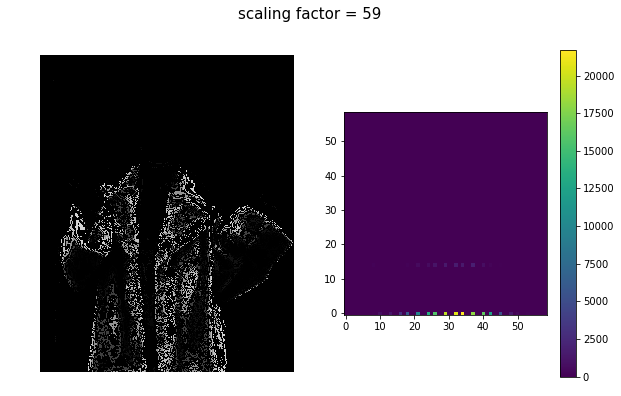

60


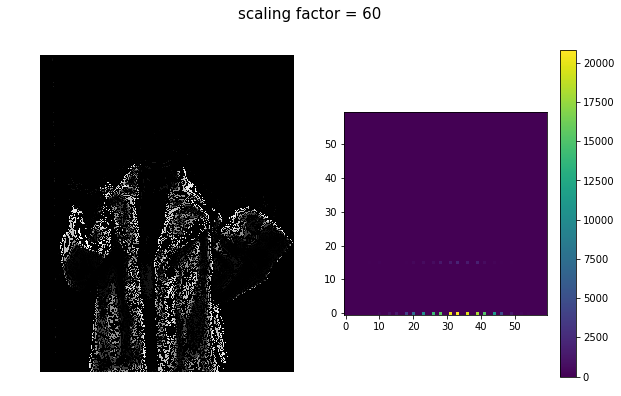

61


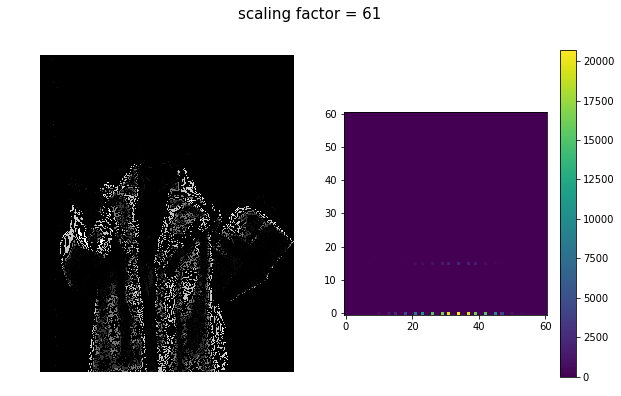

62


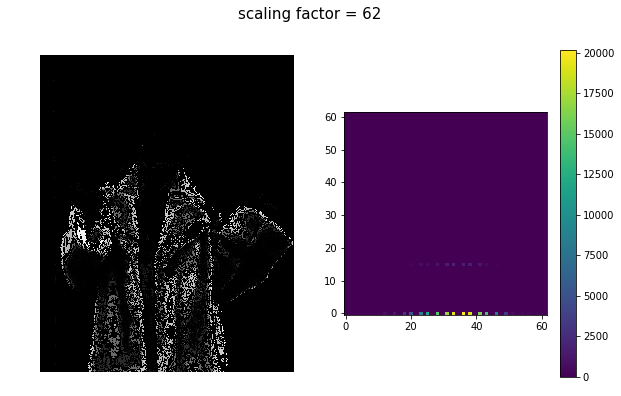

63


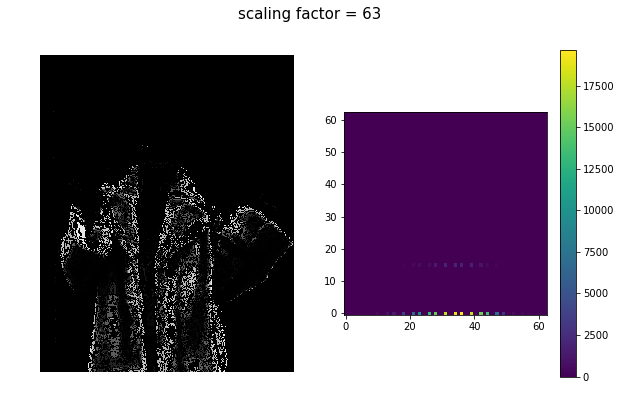

64


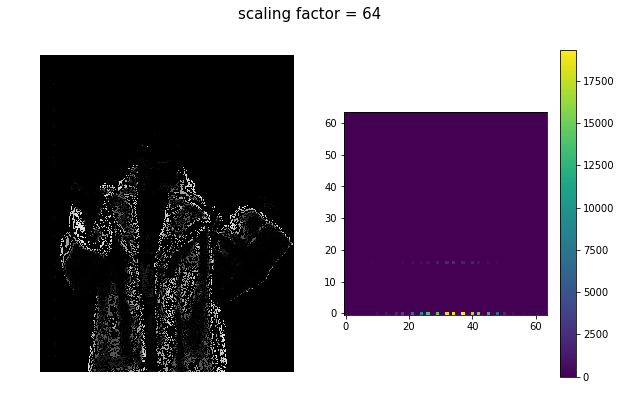

65


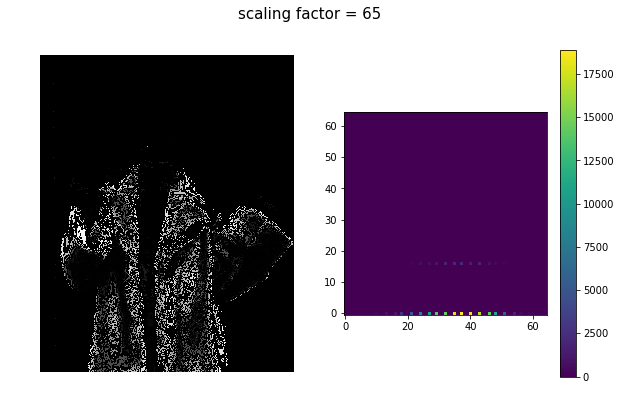

66


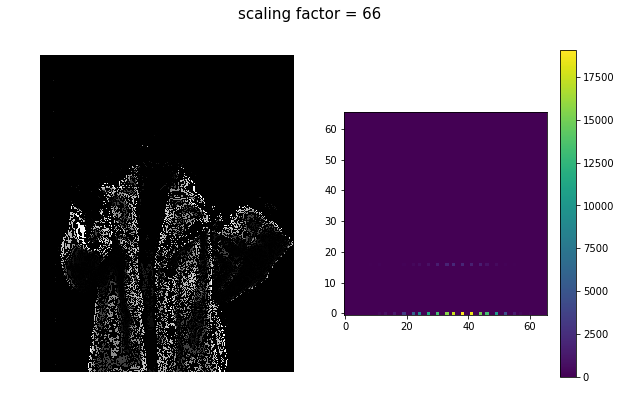

67


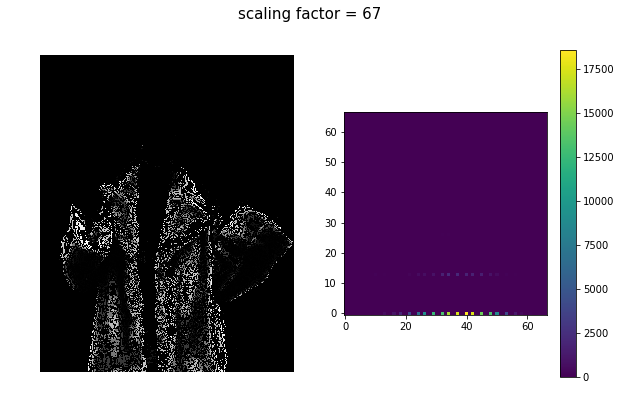

68


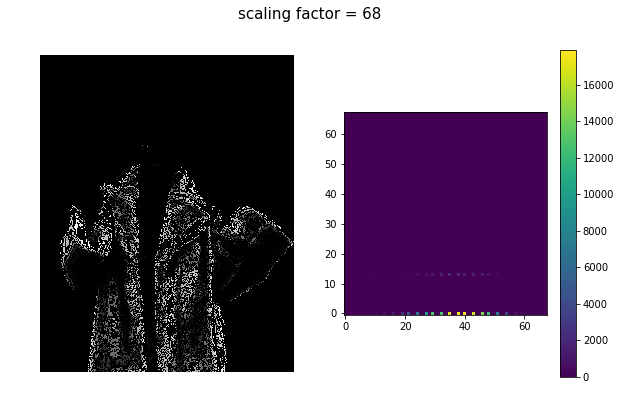

69


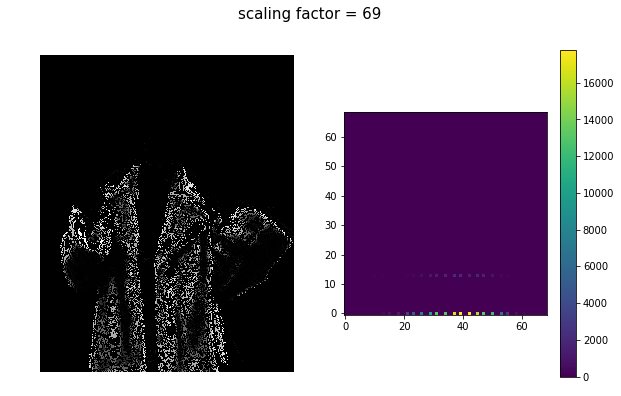

70


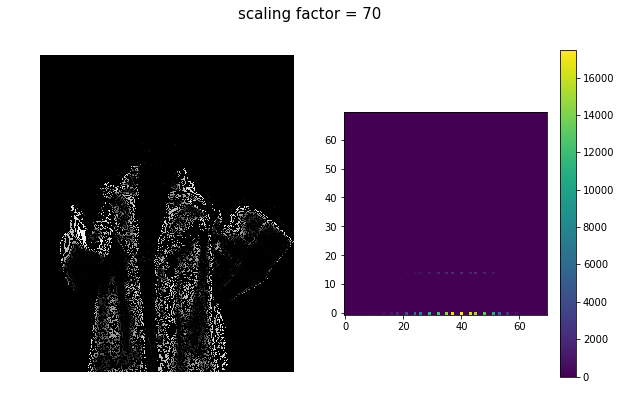

71


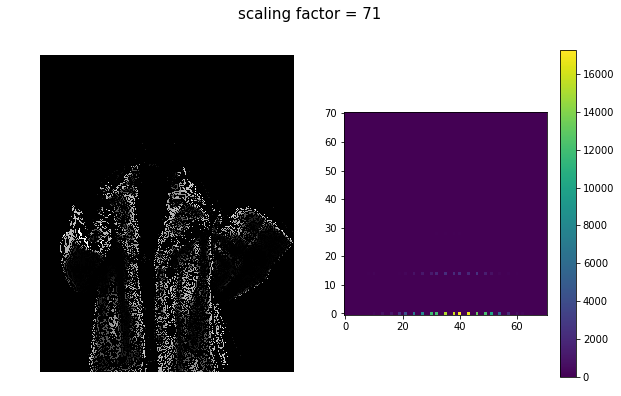

72


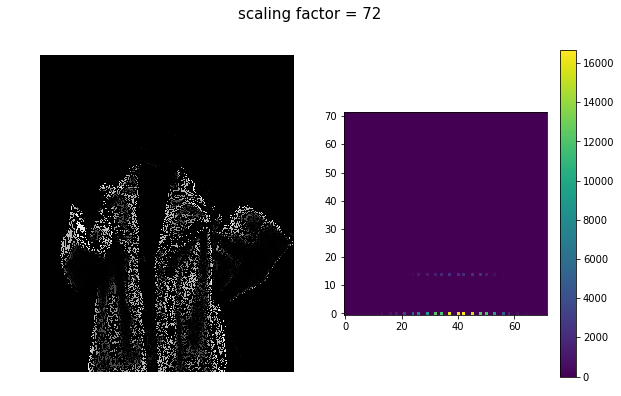

73


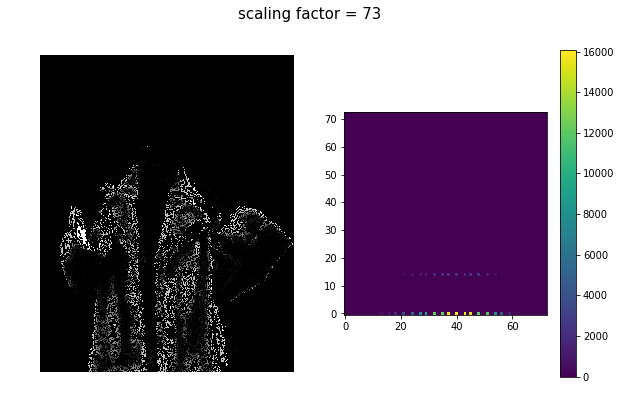

74


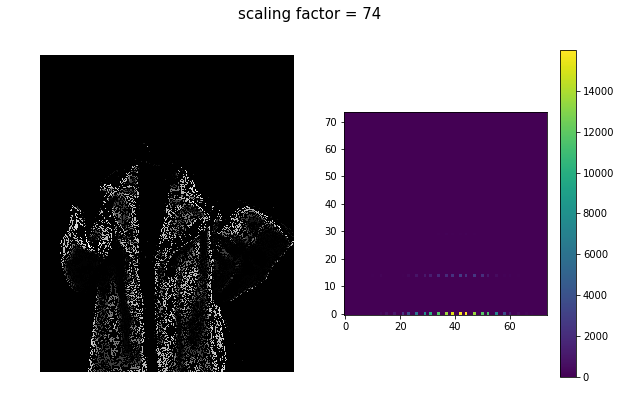

75


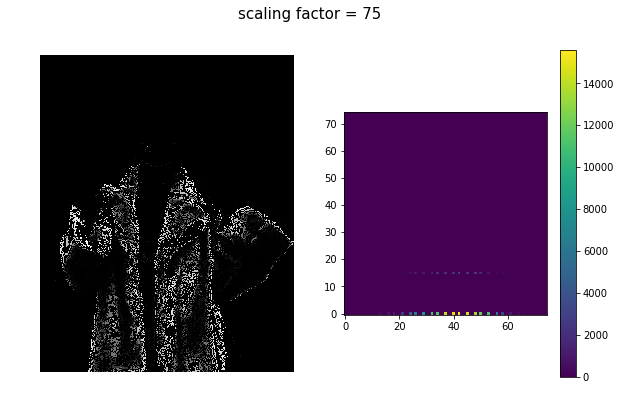

76


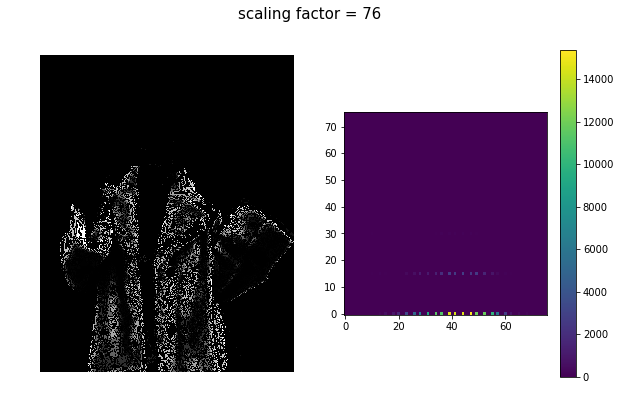

77


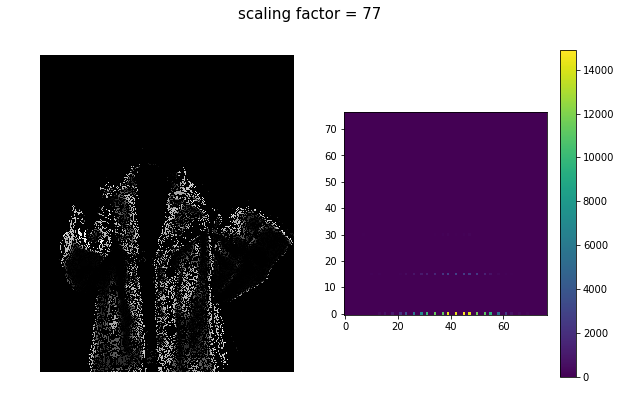

78


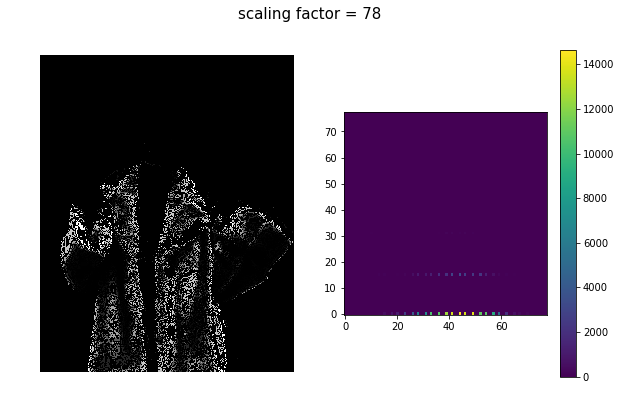

79


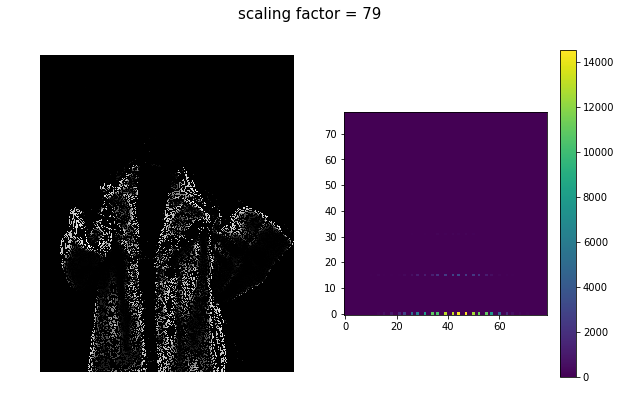

In [31]:
constant = 50

for constant in np.arange(10,80):
    print(constant)
    r_img_crop_int = (r_img_crop * constant).astype(int)
    g_img_crop_int = (g_img_crop * constant).astype(int)

    H_img_crop, xedges_img_crop, yedge_img_crop = np.histogram2d(g_img_crop_int.flatten(),
                                                                 r_img_crop_int.flatten(),
                                                                 bins=constant)

    r_img_int = (r_img * constant).astype(int)
    g_img_int = (g_img * constant).astype(int)

    x,y = r_img_int.shape

    Image = np.zeros([x, y])

    for i in range(x):
        for j in range(y):
            r_val = r_img_int[i][j]
            g_val = g_img_int[i][j]

            if r_val == constant:
                r_val -= 1
            if g_val == constant:
                g_val -= 1

            Image[i][j] = H_img_crop[g_val, r_val]

            
    plt.figure(figsize=(10,6))
    plt.subplot(121)
    plt.imshow(Image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(122)
    plt.imshow(H_img_crop, origin='lower')
    plt.colorbar()
    
    plt.suptitle('scaling factor = ' +str(constant), fontsize=15)

    plt.savefig('data/image_'+str(constant)+'.png', bbox_inches='tight')
    plt.show()